In [3]:
!pip install scikit-learn seaborn os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


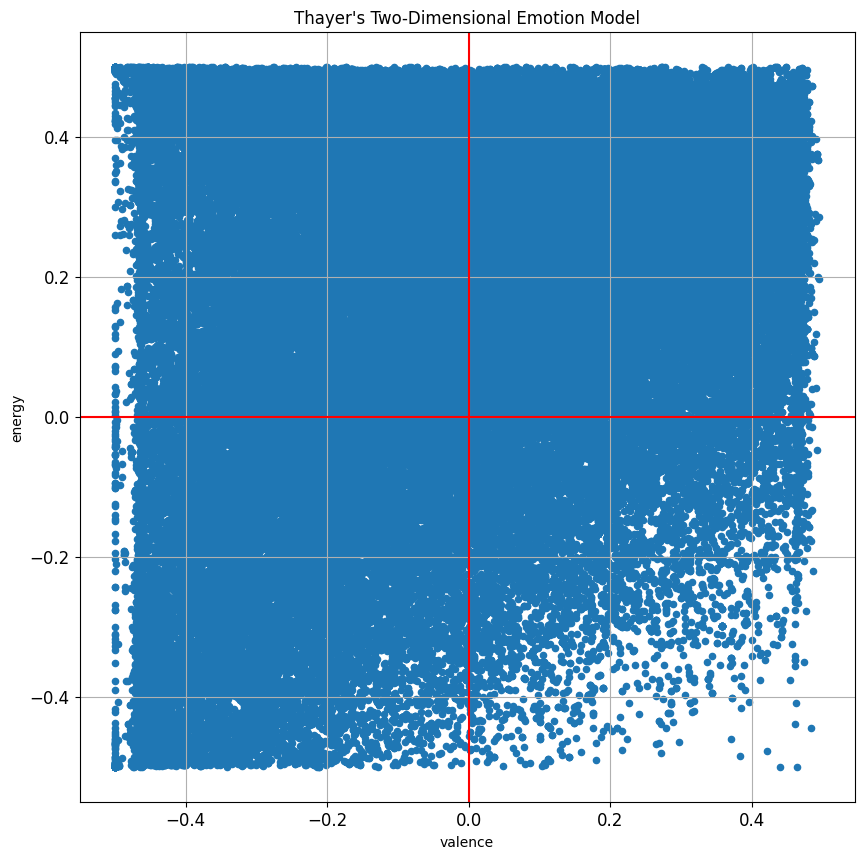

Filtered Songs: [array([79.   ,  0.1  ,  0.138]), array([99.   ,  0.193,  0.28 ]), array([1.00e+02, 4.20e-02, 1.55e-01]), array([103.   ,   0.183,   0.158]), array([1.28e+02, 1.17e-01, 1.23e-01]), array([137.   ,   0.164,   0.267]), array([140.   ,   0.148,   0.211]), array([1.58e+02, 2.90e-02, 1.24e-01]), array([1.66e+02, 6.30e-02, 1.46e-01]), array([1.69e+02, 7.30e-02, 2.86e-01]), array([3.45e+02, 1.44e-01, 2.02e-01]), array([3.70e+02, 4.90e-02, 1.44e-01]), array([3.71e+02, 1.44e-01, 2.69e-01]), array([3.75e+02, 1.60e-02, 1.03e-01]), array([3.90e+02, 1.21e-01, 2.05e-01]), array([4.35e+02, 8.90e-02, 2.91e-01]), array([4.49e+02, 8.60e-02, 2.72e-01]), array([4.94e+02, 1.98e-01, 1.74e-01]), array([4.95e+02, 1.36e-01, 2.33e-01]), array([4.99e+02, 1.62e-01, 1.96e-01]), array([5.71e+02, 1.36e-01, 1.82e-01]), array([5.84e+02, 1.56e-01, 2.46e-01]), array([5.85e+02, 7.50e-02, 2.55e-01]), array([6.18e+02, 9.20e-02, 1.17e-01]), array([6.74e+02, 1.78e-01, 1.47e-01]), array([6.77e+02, 1.15e-01, 1.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Thayer_Model:
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.mood_vector = []
        self.data = []
        self.self_weight_vec = None  # Placeholder for weight vector

    def load_data(self):
        df = pd.read_csv(self.dataset_path, low_memory=False)
        df.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')
        return df

    def pre_process(self):
        data = self.load_data()
        mood_vector = data[['valence', 'energy']].to_numpy()
        for i in range(len(mood_vector)):
            mood_vector[i][0] = float(mood_vector[i][0]) - 0.5
            mood_vector[i][1] = float(mood_vector[i][1]) - 0.5
        return mood_vector

    def plot_data(self, vec):
        x = vec[:, 0]
        y = vec[:, 1]
        
        fig, ax = plt.subplots(figsize=(10, 10))
        df1 = pd.DataFrame({'valence': x, 'energy': y})
        df1.plot(kind="scatter", x="valence", y="energy", 
                 title="Thayer's Two-Dimensional Emotion Model",
                 grid=True, fontsize=12, ax=ax)

        # Add vertical and horizontal axes at 0 (valence and energy)
        ax.axvline(0, color="red")  # Vertical line (valence=0)
        ax.axhline(0, color="red")  # Horizontal line (energy=0)

        plt.show()

    def select_region(self, valence, energy):
        region_width = 0.2
        upper_limit = energy + region_width / 2
        lower_limit = energy - region_width / 2
        left_limit = valence - region_width / 2
        right_limit = valence + region_width / 2

        data = self.load_data()
        mood_vector = data[['id', 'valence', 'energy']].to_numpy()
        
        for i in range(len(mood_vector)):
            mood_vector[i][1] = float(mood_vector[i][1]) - 0.5
            mood_vector[i][2] = float(mood_vector[i][2]) - 0.5
        
        filtered_data = [row for row in mood_vector if left_limit <= row[1] <= right_limit and lower_limit <= row[2] <= upper_limit]
        return filtered_data

# Example usage in Jupyter Notebook
dataset_path = "../Datasets/spotifyDataset.csv"
thayer_model = Thayer_Model(dataset_path)

# Load and preprocess data
data = thayer_model.load_data()
mood_vector = thayer_model.pre_process()

# Plot data
thayer_model.plot_data(mood_vector)

# Select region and display results
selected_songs = thayer_model.select_region(0.1, 0.2)
print("Filtered Songs:", selected_songs)